In [107]:
from Bio import PDB
import numpy as np
import os
import pandas as pd

In [185]:
# Get the list of all files and directories
path = "/Users/pressm/Documents/StatML/TCRProject/matchV_results/Structures/"
dir_list = os.listdir(path)
for i, l in enumerate(dir_list):
    if l.startswith('.'):
        del dir_list[i]

In [186]:
len(dir_list)

1128

In [187]:
dir_split = [s.split('_') for s in dir_list]

In [188]:
df = pd.DataFrame(dir_split)

In [189]:
df['filename'] = dir_list

In [190]:
df = df.drop_duplicates(subset = [0,1])

In [191]:
df[1].unique()

array(['CSARRDTNEQFF', 'CASSVESGSAYEQYF', 'CASSQGSYGYTF', 'CASNHANTGELFF',
       'CASSYGEGSYEQYF', 'CASSTGSYGYTF', 'CASSLDRDASYNEQFF',
       'CASSYSGSNEQYF', 'CASSARSSYEQYF', 'CASRGQPNTGELFF',
       'CASSFTWTSGGTTDTQYF', 'CASSVPSGGETQYF', 'CASSVAVGTGSGANVLTF',
       'CASRLTGVNKNIQYF', 'CASSLSQLWETQY', 'CASSIRSQETQYF',
       'CASSVVDAGFEQYF', 'CASSVVAGVGYEQYF', 'CSAHRDLNTGELFF',
       'CASSVPDRNQNYEQYF', 'CASSAWTGANNEQFF', 'CSARDQQGQNTGELFF',
       'CSAGSGTRGETQYF', 'CASSLMAGTWFYEQYF', 'CSARWGGGTDTQYF',
       'CASSIGDEQYF', 'CASSIGLYGYTF', 'CASSEAELLSSYNEQFFG',
       'CASSYSSGGGETQYF', 'CASSYSTGTPGIYT', 'CASSVTSSRGGTDTQYF',
       'CASSLAQGFHEQYF', 'CASSIRSSYEQYF', 'CASSFSETSTDTQYF',
       'CSARGGTGNGYTF', 'CASSAGTSGVYNEQFF', 'CASSIRSTYEQYF',
       'CASSLGQAYEQYF', 'CSARDRLAGEYSEQYF', 'CASSSQNTAEAFF',
       'CSARDRGGENTGELFF', 'CAGQLANTGELFF', 'CASSLGDFLRTDTQYF',
       'CASSMRSGSEQFF', 'CASSVGGAGVSNEQFF', 'CSARDLRVSTEAFF',
       'CASSIRAAYEQYF', 'CASSPPGTGEAQAFF', 'CGARDGP

In [192]:
from Bio.pairwise2 import *
def get_start_stop(seq, cdr3):
    start_idx = len(seq.split(cdr3)[0])
    stop_idx = len(seq) - len(seq.split(cdr3)[1])
    
    return start_idx, stop_idx
    
get_start_stop(seq,cdr3)

(87, 99)

In [195]:
def compare_cdr3(ref, new, cdr3, path, idx): #compares two cdr3s
    # Load the two structures
    parser = PDB.PDBParser()

    for file in dir_list:
        structure1 = parser.get_structure('structure1', path + ref)
        structure2 = parser.get_structure('structure2', path + new)

    # Extract the atom coordinates of the aligned residues
        residues1 = []
        residues2 = []
        for model1, model2 in zip(structure1, structure2):
            for chain1, chain2 in zip(model1, model2):
                poly1 = PDB.Polypeptide.Polypeptide(chain1).get_sequence()
                poly1_s, poly1_e = get_start_stop(poly1, cdr3) 
                poly2 = PDB.Polypeptide.Polypeptide(chain2).get_sequence() 
                poly2_s, poly2_e = get_start_stop(poly2, cdr3)
                chain1_slice = [res for res in chain1 if poly1_s < res.id[1] <= poly1_e]
                chain2_slice = [res for res in chain2 if poly2_s < res.id[1] <= poly2_e] 
                for residue1, residue2 in zip(chain1_slice, chain2_slice):
                    if residue1.has_id('CA'):
                        residues1.append(residue1['CA'])
                    if residue2.has_id('CA'):
                        residues2.append(residue2['CA'])
    # Perform the structural superimposition
        superimposer = PDB.Superimposer()
        superimposer.set_atoms(residues1, residues2)
        superimposer.apply(residues2)
        return(superimposer.rms)
        

In [196]:
repeats = []
mean_result = []
std_result = []
num_repeats = []
duplicates = []
for id in df[1].unique(): #find the files that contain the same vdjdb cdr3 and compare them
    df_sub = df[df[1] == id]
    df_sub = df_sub.reset_index(drop = True)
    if len(df_sub) > 1:
        ref = df_sub['filename'].iloc[0]
        res = []
        for i in range(1,len(df_sub)):
            new = df_sub['filename'].iloc[i]
            res.append(compare_cdr3(ref, new, id, path, 0))
        print(res)
        duplicates.append(df_sub[0].values)
        num_repeats.append(len(df_sub))
        repeats.append(id)
        mean_result.append(np.mean(res))
        std_result.append(np.std(res))

[5.240918582948187e-15]
[1.1625415980626324]
[1.2728406129405392]
[1.1271739748000455e-15]
[2.992390580450473, 2.7031733984485484]
[3.446860576627493e-15, 3.446860576627493e-15]
[1.1088104203746145]
[3.4889558180370535e-15]
[3.1881782364686756e-15]
[3.939972413308274]
[0.6923547450221536]
[4.257238459077991e-15]
[2.3601111148372818, 3.748955369454309e-15]
[6.102498874827135e-15]
[1.5648735742348965, 1.7595818811302875]
[0.23005396843461529, 5.2942679662080745e-15]
[0.5289460343401796]
[2.860726798592879e-15, 3.4212430996601038]
[2.5121951117100183e-15]
[1.032578432563632]
[2.48577842419414e-15]
[1.9655292964749e-15, 1.9655292964749e-15]
[2.4381067199968474, 2.4381067199968474, 2.4381067199968474]
[1.886008399057247]
[2.2873330316873422e-15]
[3.4704782923191972]
[0.9191339764088822]
[2.380251118286585e-15]
[3.0364588257878743e-15]
[7.0722125642749194e-15]
[3.0143658586214952e-15]
[2.0075745073599878]
[3.0665990490129826, 3.0665990490129826]
[4.268295401905863e-15]
[2.4236514457283395e-1

In [197]:
results  = pd.DataFrame({'duplicates':duplicates,'ID':repeats, 'mean':mean_result, 'std':std_result, 'num_repeats':num_repeats})

In [198]:
lens1 = []
for dup in results[results['mean'] > 2]['duplicates'].values:
    l = []
    for d in dup:
        l.append(len(d))
        
    lens1.append(np.mean(l))
    
lens2 = []
for dup in results[results['mean'] <= 2]['duplicates'].values:
    l = []
    for d in dup:
        l.append(len(d))
        
    lens2.append(np.mean(l))
    

In [203]:
np.mean(lens1)

14.681623931623932

In [204]:
np.mean(lens2)

14.16951566951567

In [199]:
df1 = pd.DataFrame({'cat':'error > 2', 'results': lens1})
df2 = pd.DataFrame({'cat':'error <= 2', 'results': lens2})

In [200]:
df = pd.concat([df1, df2])

<AxesSubplot: xlabel='cat', ylabel='results'>

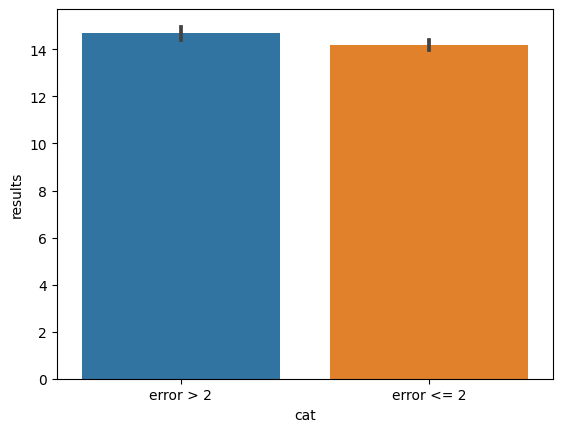

In [201]:
sns.barplot(df, x = 'cat', y = 'results')

In [202]:
from scipy.stats import mannwhitneyu

res = mannwhitneyu(lens, lens2)
print(res)

MannwhitneyuResult(statistic=2889.0, pvalue=0.011777752035695047)


In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'mean difference (Angstroms)')

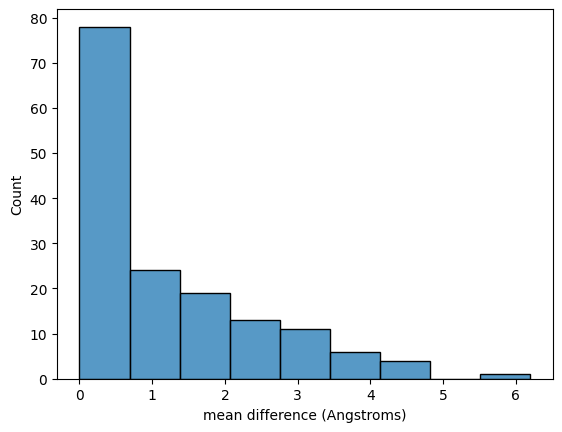

In [145]:
sns.histplot(results, x = 'mean')
plt.xlabel('mean difference (Angstroms)')